In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.layers import BatchNormalization
from keras.optimizers import Nadam
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Для начала удалим не нужные данные из таблицы, дабы улучшить выборку, а именно Embarked - выживаемость пассажира никак не зависит от порта в котором он сел на борт титаника, passengerId - данная информация не имеет смысла для предсказывания выживаемости пассажира, Cabin - номер каюты не зависит от выживаемости пассажира

In [7]:
df = df.drop('Cabin', axis=1)
df = df.drop('PassengerId', axis=1)
df = df.drop('Embarked', axis=1)

In [9]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


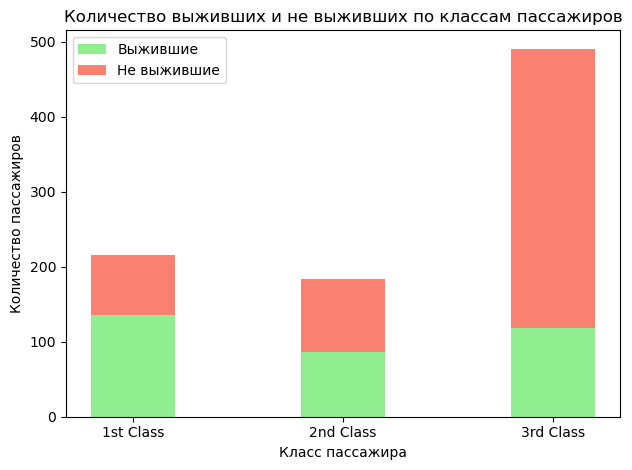

In [13]:
# Подсчёт количества выживших по классам
survived_count = df.groupby('Pclass')['Survived'].sum()
total_count = df.groupby('Pclass')['Survived'].count()
not_survived_count = total_count - survived_count

# Создание графика
labels = ['1st Class', '2nd Class', '3rd Class']
survived = survived_count.values
not_survived = not_survived_count.values

x = range(len(labels))

# Столбцовая диаграмма
plt.bar(x, survived, width=0.4, label='Выжившие', color='lightgreen', align='center')
plt.bar(x, not_survived, width=0.4, label='Не выжившие', color='salmon', bottom=survived)

plt.xlabel('Класс пассажира')
plt.ylabel('Количество пассажиров')
plt.title('Количество выживших и не выживших по классам пассажиров')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()

# Показать график
plt.show()

Как мы видим по этому графику больше шансов выжить у людей которые пребывали в первом классе, у тех кто во втором 50/50, а у тех кто в третьем шансов значительно меньше

In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [17]:
df['Age'].fillna(df['Age'].median(),inplace = True)

C:\Users\alexr\AppData\Local\Temp\ipykernel_29884\1750550615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace = True)


In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

Мы уквидели что среди значений возраста есть значения Null, заполним их медианными

C:\Users\alexr\AppData\Local\Temp\ipykernel_29884\1715911484.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_count = df[df['Survived'] == 1].groupby('AgeGroup').size()
C:\Users\alexr\AppData\Local\Temp\ipykernel_29884\1715911484.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  not_survived_count = df[df['Survived'] == 0].groupby('AgeGroup').size()


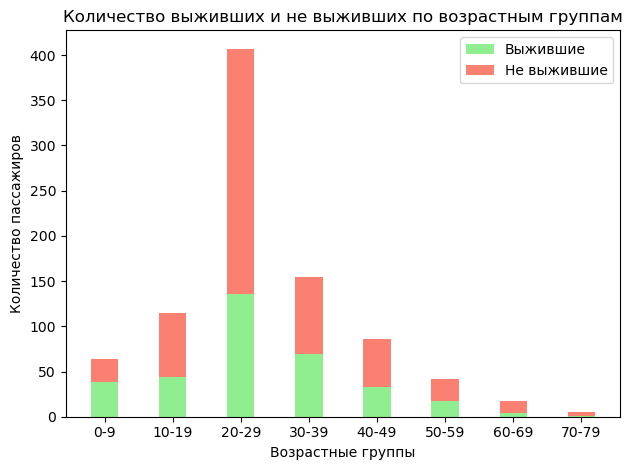

In [21]:
# Разделение по возрастным группам
age_bins = range(0, 81, 10)  # Разделяем на группы по 10 лет
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Подсчет количества выживших и не выживших по возрастным группам
survived_count = df[df['Survived'] == 1].groupby('AgeGroup').size()
not_survived_count = df[df['Survived'] == 0].groupby('AgeGroup').size()

# Создание графика
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]
x = range(len(age_labels))

# Столбцовая диаграмма
plt.bar(x, survived_count, width=0.4, label='Выжившие', color='lightgreen', align='center')
plt.bar(x, not_survived_count, width=0.4, label='Не выжившие', color='salmon', bottom=survived_count)

plt.xlabel('Возрастные группы')
plt.ylabel('Количество пассажиров')
plt.title('Количество выживших и не выживших по возрастным группам')
plt.xticks(x, age_labels)
plt.legend()
plt.tight_layout()

# Показать график
plt.show()

Как мы видим на графике больше всего пассажиров было в возрасте от 20 до 29 лет и большинство из них не выжило, в остальных случаях не выжило либо не сильно больше либо меньше. Так же добавим в таблицу столбец с возрастной категорией пассажира для более лучшего обучения модели

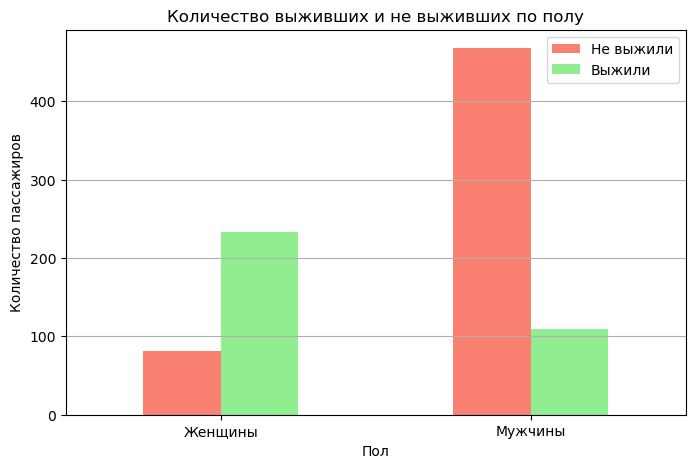

In [23]:
# Группировка данных по полу и выживаемости
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Переименование индексов
survival_counts.index = ['Женщины', 'Мужчины']

# Построение графика
survival_counts.plot(kind='bar', stacked=False, color=['salmon', 'lightgreen'], figsize=(8, 5))

plt.title('Количество выживших и не выживших по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=0)
plt.legend(['Не выжили', 'Выжили'])
plt.grid(axis='y')
plt.show()

Как мы видим по данному графику больше выжило женщин нежеле мужчин. А как это зависит от возраста

C:\Users\alexr\AppData\Local\Temp\ipykernel_29884\3184467914.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df.groupby(['AgeGroup', 'Sex', 'Survived']).size().unstack(fill_value=0)


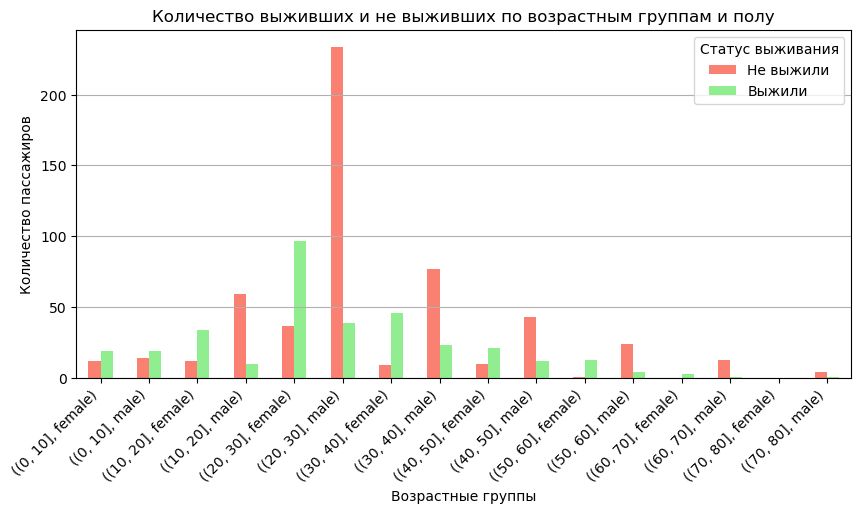

In [25]:
# Группировка данных по возрастным группам и полу, подсчет выживших и не выживших
survival_counts = df.groupby(['AgeGroup', 'Sex', 'Survived']).size().unstack(fill_value=0)

# Переименование столбцов для удобства
survival_counts.columns = ['Не выжили', 'Выжили']

# Построение графика
ax = survival_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'lightgreen'])

# Поворот меток по оси X
plt.xticks(rotation=45, ha='right')  # Поворачиваем метки на 45 градусов

plt.title('Количество выживших и не выживших по возрастным группам и полу')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество пассажиров')
plt.legend(title='Статус выживания')
plt.grid(axis='y')
plt.subplots_adjust(bottom=0.3)  # Увеличение отступа снизу для меток
plt.show()

Как мы можем видеть, шанс выжить и мужчинам и женщинам от 0 до 10 почти равнозначный, и мы в целом видим что любой возрастной категории у женщин шанс выжить куда больше чем у мужчин. Добавим новый столбец с данными о поле и возрастной категории пассажира для более лучшей выборки

In [27]:
df['Sex_AgeGroup'] = df['Sex'].astype(str) + ', ' + df['AgeGroup'].astype(str)

In [29]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,AgeGroup,Sex_AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,"(20, 30]","male, (20, 30]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,"(30, 40]","female, (30, 40]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,"(20, 30]","female, (20, 30]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,"(30, 40]","female, (30, 40]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,"(30, 40]","male, (30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,"(20, 30]","male, (20, 30]"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,"(10, 20]","female, (10, 20]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,"(20, 30]","female, (20, 30]"
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,"(20, 30]","male, (20, 30]"


C:\Users\alexr\AppData\Local\Temp\ipykernel_29884\395267831.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_counts = df.groupby(['FareBin', 'Survived']).size().unstack(fill_value=0)


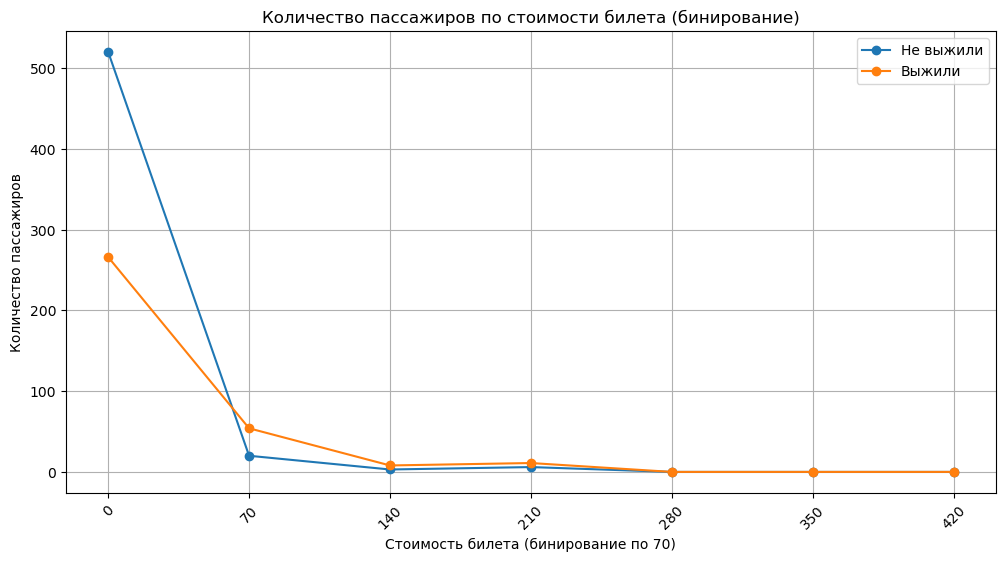

In [31]:
# Определяем бины для стоимости билета
bins = range(0, 501, 70)  # От 0 до 500 с шагом 70
labels = range(0, 490, 70)  # Метки для бинов

# Создаем новый столбец для бинования
df['FareBin'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)

# Подсчет количества пассажиров по различным бинам для выживших и не выживших
fare_counts = df.groupby(['FareBin', 'Survived']).size().unstack(fill_value=0)

# Построение графика с ломаной линией для выживших и не выживших
plt.figure(figsize=(12, 6))
plt.plot(fare_counts.index.astype(str), fare_counts[0], marker='o', label='Не выжили', linestyle='-')
plt.plot(fare_counts.index.astype(str), fare_counts[1], marker='o', label='Выжили', linestyle='-')
plt.title('Количество пассажиров по стоимости билета (бинирование)')
plt.xlabel('Стоимость билета (бинирование по 70)')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=45)  # Поворот значений по оси x для удобства
plt.grid()
plt.legend()  # Добавляем легенду для обозначения линий
plt.show()

Как мы видим на графике шанс выжить больше у тех у кого билет дороже

In [33]:
df = df.drop('FareBin', axis=1)


теперь у нас есть какое-никакое представление о шансе выживания пассажиров, обучим модель, но для начало привидём всё в числа

In [35]:
categorial_cols = df.select_dtypes(include=['object']).columns
label_encoders={}
for col in categorial_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [37]:
label_encoder = LabelEncoder()
df['AgeGroup'] = label_encoder.fit_transform(df['AgeGroup'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    int32  
 3   Sex           891 non-null    int32  
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    int32  
 8   Fare          891 non-null    float64
 9   AgeGroup      891 non-null    int32  
 10  Sex_AgeGroup  891 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 59.3 KB


In [41]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,AgeGroup,Sex_AgeGroup
0,0,3,108,1,22.0,1,0,523,7.2500,2,9
1,1,1,190,0,38.0,1,0,596,71.2833,3,3
2,1,3,353,0,26.0,0,0,669,7.9250,2,2
3,1,1,272,0,35.0,1,0,49,53.1000,3,3
4,0,3,15,1,35.0,0,0,472,8.0500,3,10
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.0,0,0,101,13.0000,2,9
887,1,1,303,0,19.0,0,0,14,30.0000,1,1
888,0,3,413,0,28.0,1,2,675,23.4500,2,2
889,1,1,81,1,26.0,0,0,8,30.0000,2,9


In [43]:
X = df.drop(columns=['Survived'])
y = df['Survived']

Epoch 1/20


C:\Users\alexr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5661 - loss: 0.6802 - val_accuracy: 0.6294 - val_loss: 0.6576
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6261 - loss: 0.6362 - val_accuracy: 0.6993 - val_loss: 0.6037
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7184 - loss: 0.5732 - val_accuracy: 0.7902 - val_loss: 0.5444
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.5206 - val_accuracy: 0.8462 - val_loss: 0.4885
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7829 - loss: 0.4885 - val_accuracy: 0.8462 - val_loss: 0.4460
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4383 - val_accuracy: 0.8531 - val_loss: 0.4255
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.4227 - val_accuracy: 0.8601 - val_loss: 0.4026
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8139 - loss: 0.4083 - val_accuracy: 0.8601 - val_loss: 0.3976
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

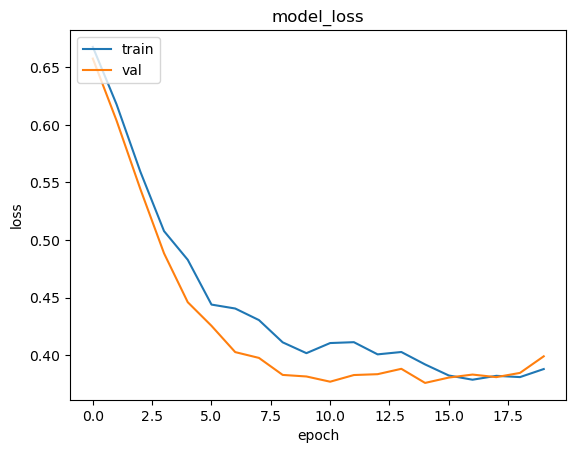

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/30


C:\Users\alexr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5689 - loss: 0.6867 - val_accuracy: 0.7762 - val_loss: 0.6437
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.6207 - val_accuracy: 0.8531 - val_loss: 0.5374
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7776 - loss: 0.5449 - val_accuracy: 0.8601 - val_loss: 0.4427
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8140 - loss: 0.4447 - val_accuracy: 0.8531 - val_loss: 0.3915
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.4212 - val_accuracy: 0.8531 - val_loss: 0.3726
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.3810 - val_accuracy: 0.8601 - val_loss: 0.3707
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8102 - loss: 0.4226 - val_accuracy: 0.8601 - val_loss: 0.3852
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8284 - loss: 0.3951 - val_accuracy: 0.8741 - val_loss: 0.3726
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

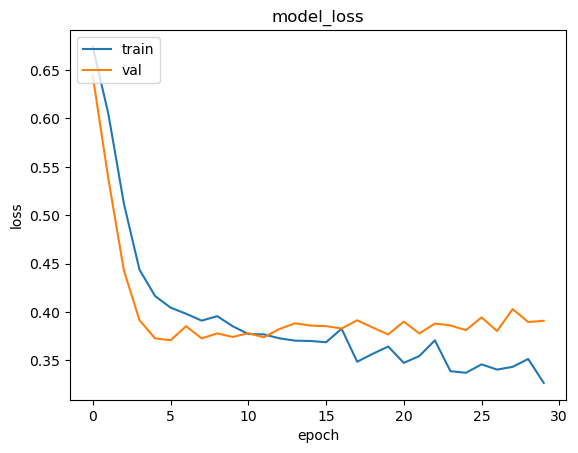

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/30


C:\Users\alexr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6317 - loss: 0.6560 - val_accuracy: 0.8322 - val_loss: 0.5526
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8175 - loss: 0.5259 - val_accuracy: 0.8462 - val_loss: 0.4521
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8265 - loss: 0.4343 - val_accuracy: 0.8741 - val_loss: 0.3905
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 0.4107 - val_accuracy: 0.8671 - val_loss: 0.3765
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3974 - val_accuracy: 0.8601 - val_loss: 0.3788
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.4038 - val_accuracy: 0.8531 - val_loss: 0.3909
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.3894 - val_accuracy: 0.8531 - val_loss: 0.3793
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8334 - loss: 0.3663 - val_accuracy: 0.8531 - val_loss: 0.3734
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

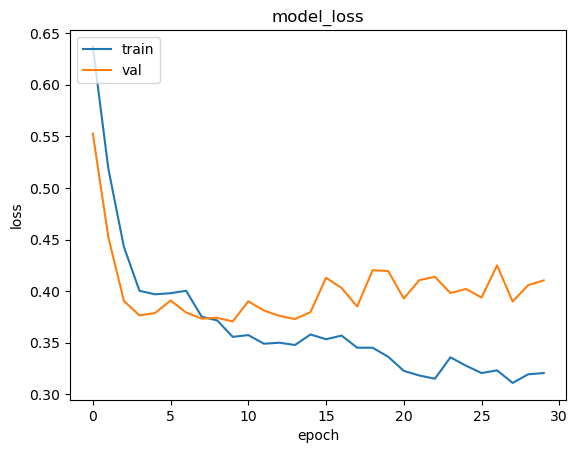

In [57]:
from keras.layers import Dropout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 43, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show